## 災害データ分析とストーリーテリング

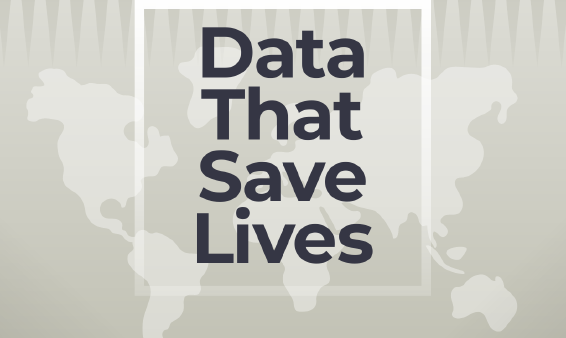
#### **チャレンジの目的**

このチャレンジでは、EM-DAT災害データセットのデータを使ってストーリーを伝える.ipynbファイルを作成します。あなたの独自の視点からデータを分析し、有意義な洞察を導き出し、それを簡潔かつ効果的に視覚的に表現することが目標です。Be creative!

#### **データセットの概要**
https://www.emdat.be/


#### **提出物**

1. **提出物の形式**:
   - Jupyter Notebook (.ipynb) ファイル
   - Markdownセルを使用して、分析の説明、洞察、結論を含むストーリーを伝える。ブログ投稿のように構成すると良いでしょう！
   - コードセルを使用して、データの読み込み、前処理、分析、可視化を行う。
   - Notebook内で生成されたグラフやチャートを含める。
   - 必ず自分のやっていること、感想、学んだことを説明する。

2. **提出方法**:
   - GitHubリポジトリにNotebookをコミットする
   - UNIPAにNotebookのリンクを提出する

3. **締め切り**:
   - 次回のクラス開始前までに提出すること



#### **要件**
1. **フォーカスエリア**:
   - 興味に基づいて**フォーカスエリア**を選択する（例: 災害の種類、死者数、人への影響、地域分析、または時間的トレンド）。

2. **分析**:
   - 計算やデータ探索を通じて、少なくとも**3つの重要な洞察**を提供する。
   - 興味深い統計（種類・地域別の数とか）、トレンド、または異常値を特定する。

3. **可視化**:
   - 分析をサポートする**少なくとも2つの可視化**を作成する。
   - 関連性があり解釈しやすいチャート（例: 棒グラフ、折れ線グラフ、散布図、ヒートマップ）を使用する。

4. **サマリー**:
   - 発見した内容を簡潔にまとめ、その重要性を説明する。



## まずはデータの読み込みから

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
emdat = pd.read_csv('emdat.csv')

In [4]:
# Explore the data
emdat.head()  # Display the first few rows

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0


## ここからはあなたの分析

以下はあくまでも例：

In [5]:
# Ranking by total deaths
death_ranking = emdat.groupby('Country')['Total Deaths'].sum().sort_values(ascending=False)
print("Top 10 countries by total deaths from disasters:")
print(death_ranking.head(10))

Top 10 countries by total deaths from disasters:
Country
China           12522453.0
India            9138244.0
Soviet Union     3857423.0
Bangladesh       2994475.0
Ethiopia          417252.0
Haiti             253200.0
Indonesia         243370.0
Japan             239761.0
Uganda            207817.0
Niger             196580.0
Name: Total Deaths, dtype: float64


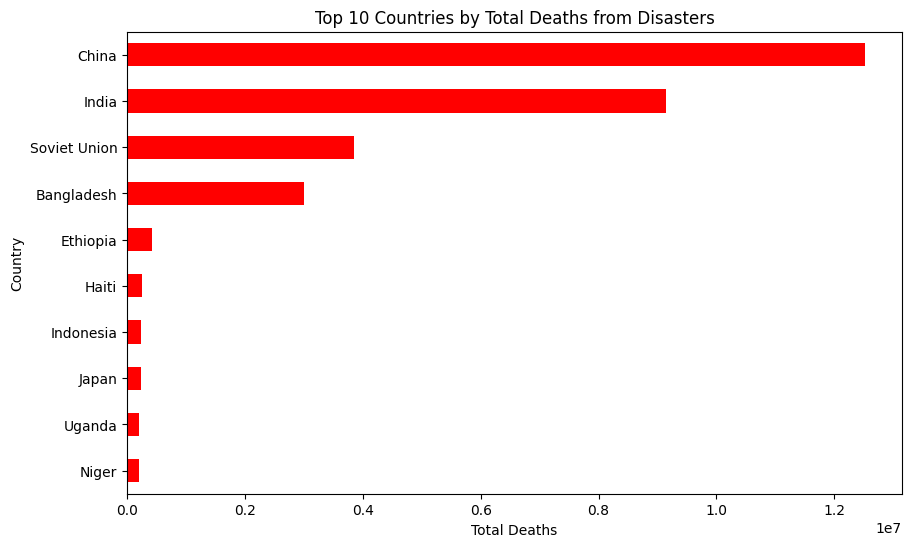

In [6]:
# ranking of total deaths in horizontal bar chart, top 10 countries, highest first 
top_10_deaths = death_ranking.head(10)
plt.figure(figsize=(10, 6))
top_10_deaths.plot(kind='barh', color='red')
plt.xlabel('Total Deaths')
plt.title('Top 10 Countries by Total Deaths from Disasters')
plt.gca().invert_yaxis()  # Highest first
plt.show()

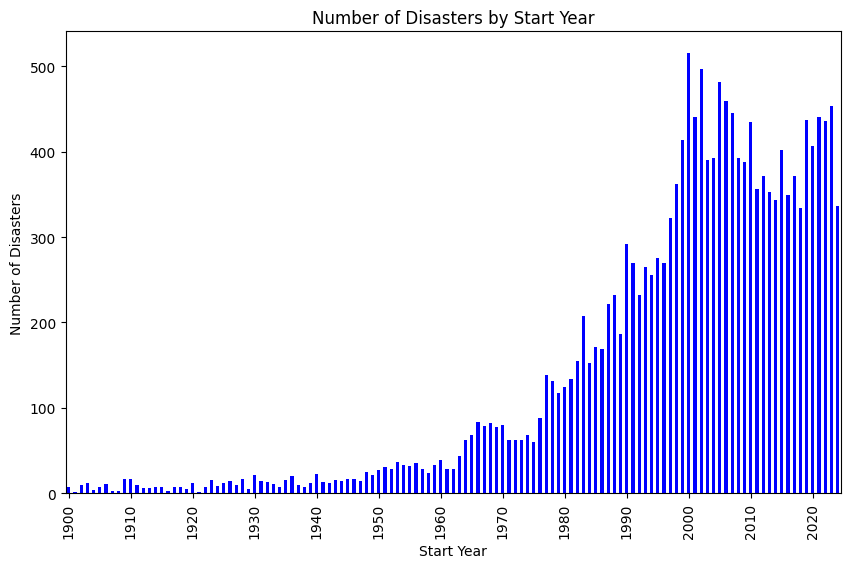

In [7]:
# disasters by year
disasters_by_year = emdat.groupby('Start Year').size()
plt.figure(figsize=(10, 6))
disasters_by_year.plot(kind='bar', color='blue')

# label only every 10 years on x-axis
plt.xticks(ticks=range(0, len(disasters_by_year), 10), labels=disasters_by_year.index[::10])   
plt.xlabel('Start Year')
plt.ylabel('Number of Disasters')
plt.title('Number of Disasters by Start Year')
plt.show()

時間的トレンド分析

年次・年代別ごとの増減、長期的傾向の分析

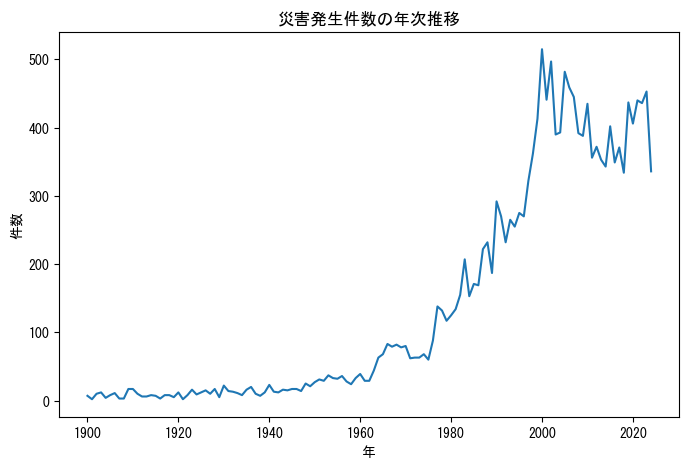

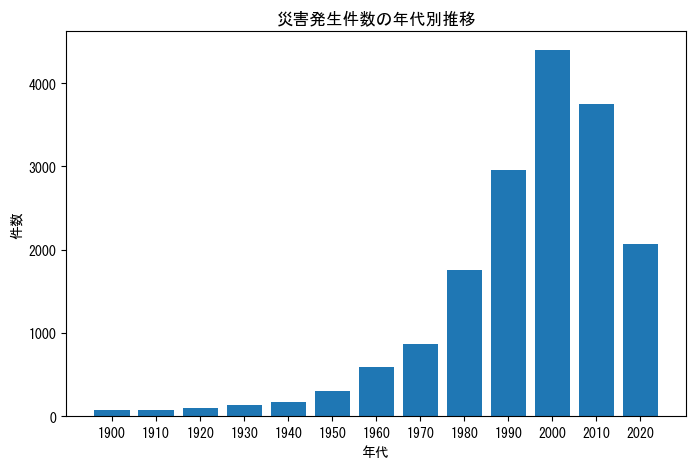

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 日本語フォント設定
plt.rcParams['font.family'] = 'MS Gothic'  

# Load dataset
import pandas as pd
df = pd.read_csv('emdat.csv')


# Normalize column names
df.columns = df.columns.str.strip().str.lower()
df = df.rename(columns={'start year':'year'})

# Convert year to numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Yearly trend
yearly = df.groupby('year').size()
plt.figure(figsize=(8,5))
plt.plot(yearly.index, yearly.values)
plt.title("災害発生件数の年次推移")
plt.xlabel("年")
plt.ylabel("件数")
plt.show()

# Decade trend
df['decade'] = (df['year'] // 10) * 10
decade_counts = df.groupby('decade').size()

plt.figure(figsize=(8,5))
plt.bar(decade_counts.index.astype(str), decade_counts.values)
plt.title("災害発生件数の年代別推移")
plt.xlabel("年代")
plt.ylabel("件数")
plt.show()


グラフからは、1950年代から2000年代にかけて災害発生件数が急激に増加していることが分かる。ピーク以降は件数が減少しているものの、大きくは下がっておらず、災害発生数は依然として多い状態が続いている。